1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [6]:
!pip install seaborn

342.94s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


/var/folders/6w/vv6mxd6s5tn2fg5xf8lytbl40000gp/T/ipykernel_64036/2664454729.py:48: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  A = np.sum(counts*np.diff(bin_edges))/trapz(G,y)


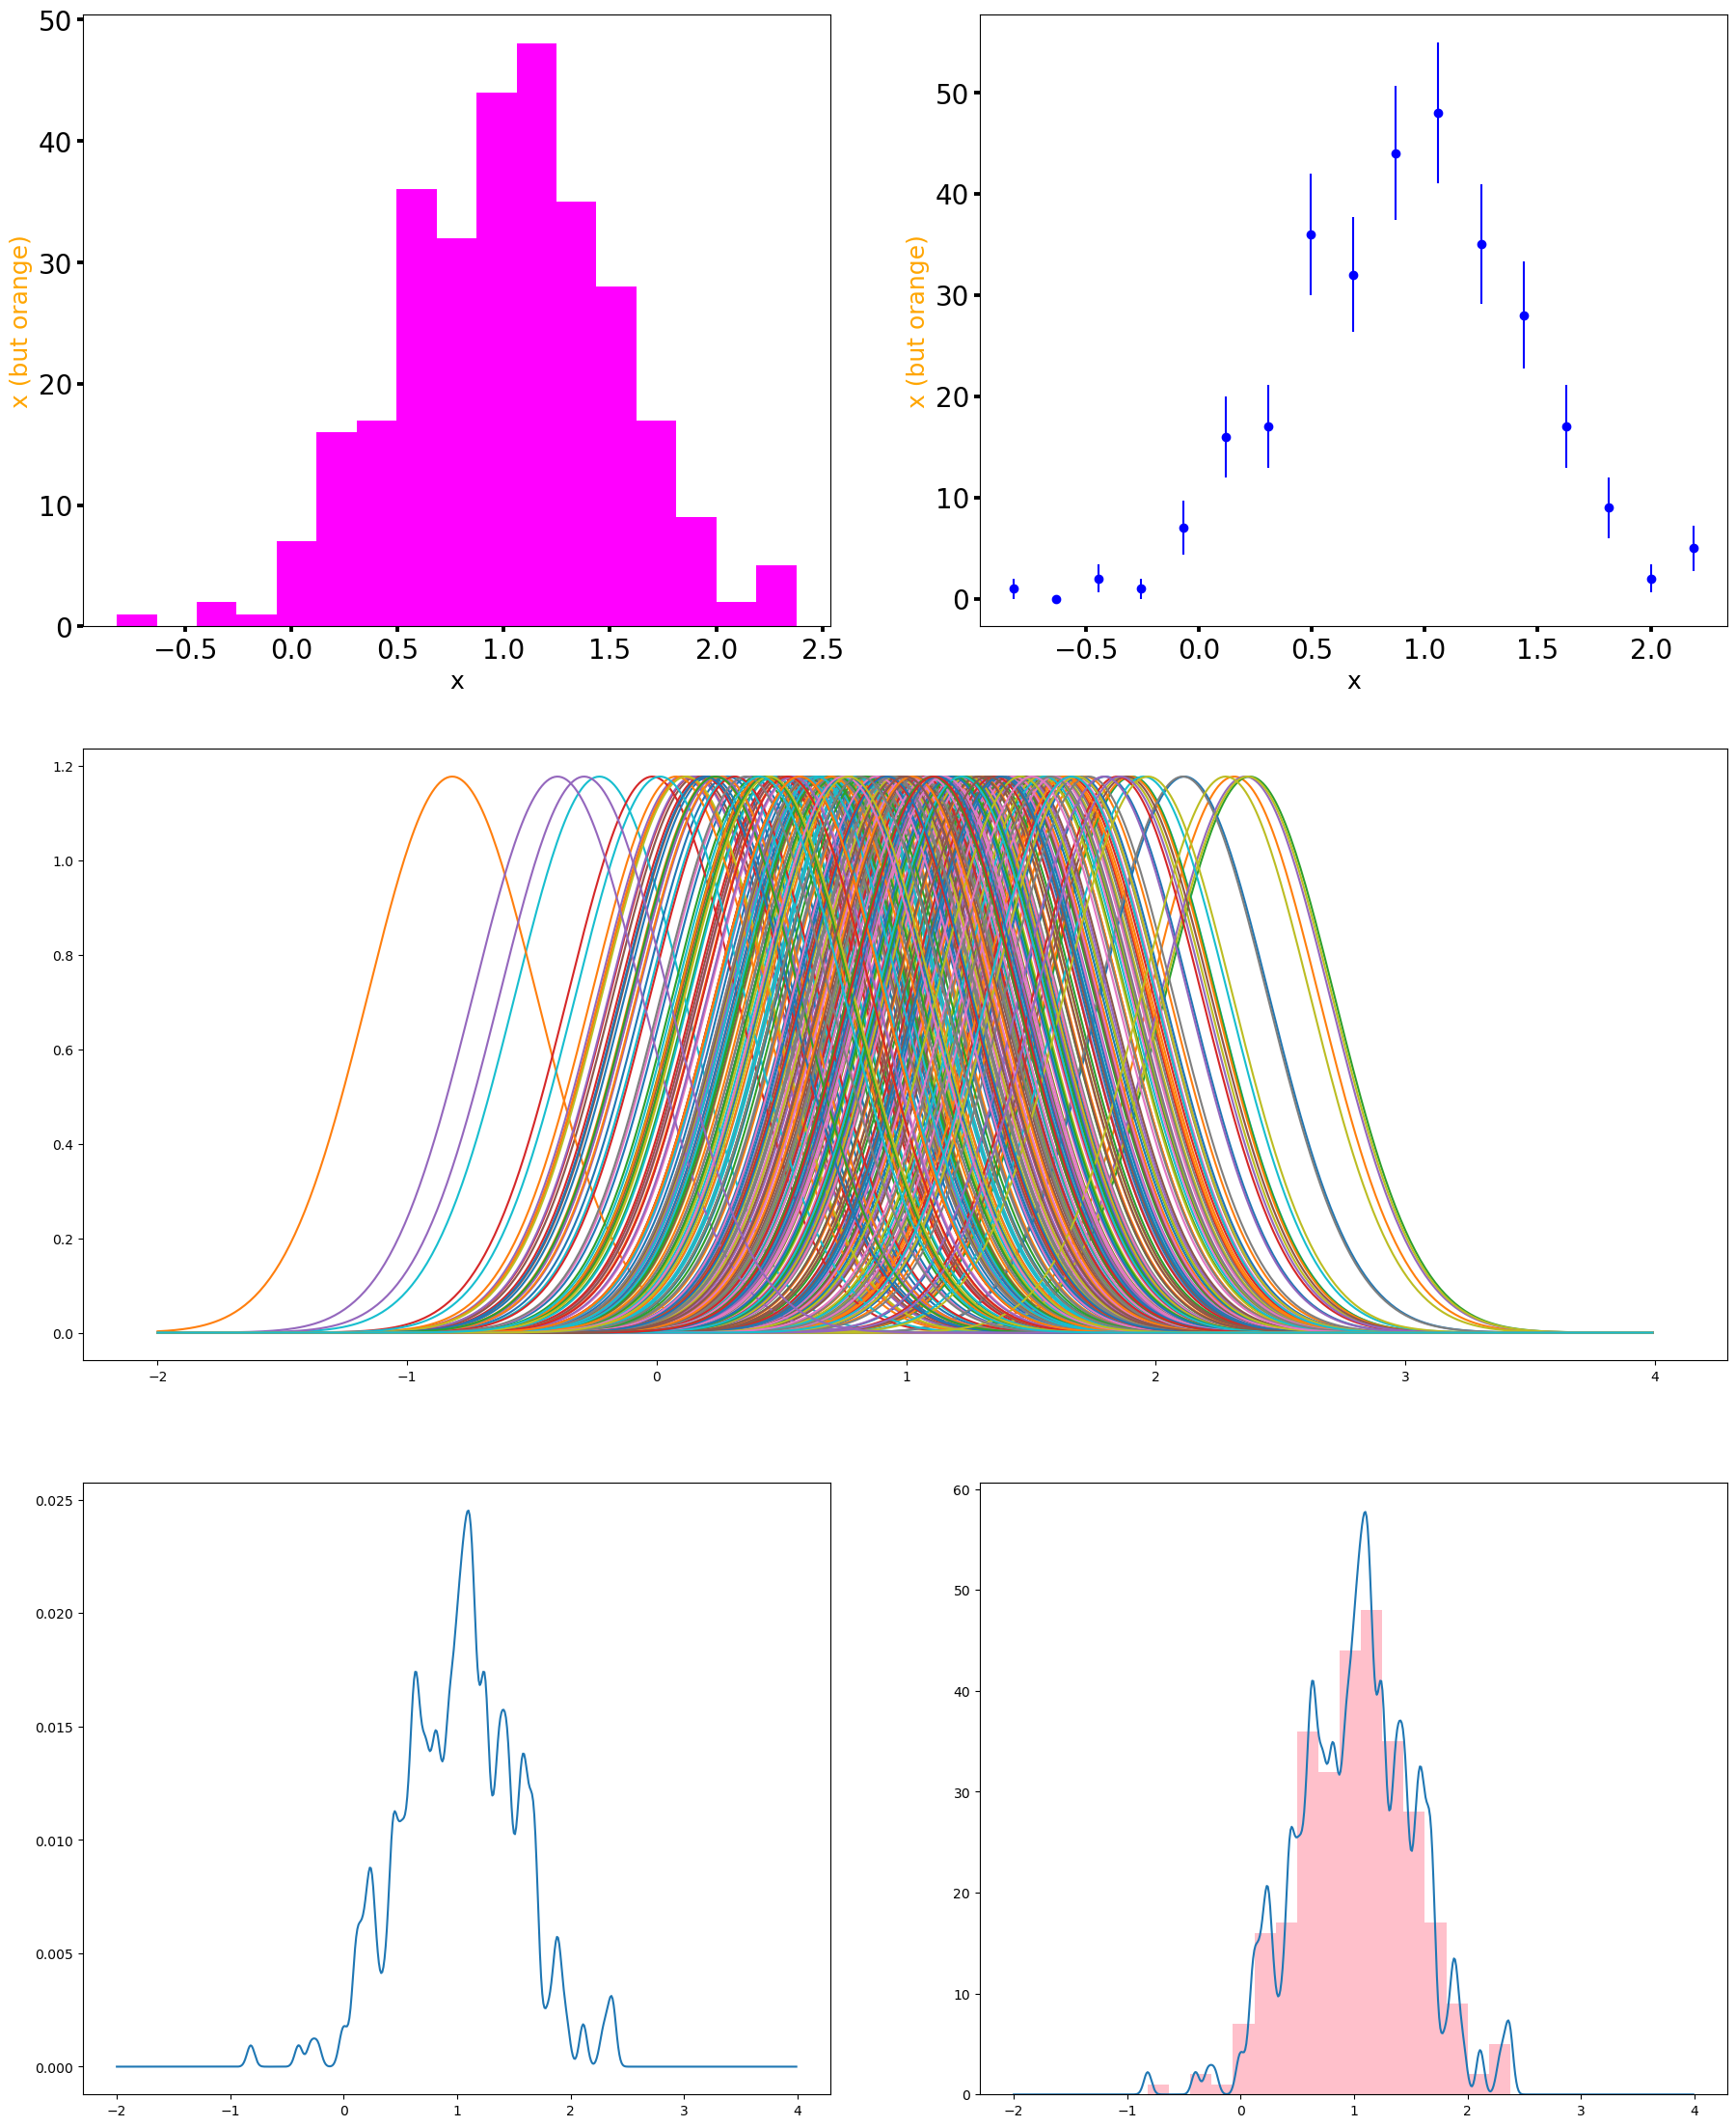

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.integrate import trapz

N = 300
mean = 1
std = 0.5
x = np.random.normal(mean, std, N)

#sns.displot(x, kde=True);

gridsize = (3, 2)
fig = plt.figure(figsize = (22,28), facecolor='white')
ax0 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax1 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (1, 0), colspan=2, rowspan=1)
ax3 = plt.subplot2grid(gridsize, (2, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid(gridsize, (2, 1), colspan=1, rowspan=1)
p = ax0.hist(x, color = 'magenta', bins = int(np.sqrt(N)))
ax1.errorbar(p[1][:-1],p[0], yerr = np.sqrt(p[0]), fmt="ob")
err = np.sqrt(abs(p[1]))
ax1.set_facecolor((1, 1, 1))
ax1.set_xlabel('x',fontsize = 18)
ax1.set_ylabel('x (but orange)',fontsize = 18, color = 'orange')
ax1.tick_params(which='both', width=2.75, length=4.5, labelsize=20)

ax0.set_xlabel('x',fontsize = 18)
ax0.set_ylabel('x (but orange)',fontsize = 18, color = 'orange')
ax0.tick_params(which='both', width=2.75, length=4.5, labelsize=20)



mean, var = norm.stats(x)
std_x = 1.06*np.sqrt(var)*len(x)**(-1/5)
y = np.arange(-2,4,0.01)

for i in range(len(mean)):
    gauss = norm.pdf(y, mean[i], std_x[i])
    f = ax2.plot(y, gauss)

h = 0.1
G = [1/N*1/np.sqrt(4*np.pi)*np.sum(np.e**((-(i-x)**2)/2/std_x**2/h**2)) for i in y]
ax3.plot(y,G)
ax4.hist(x, color = 'pink', bins = int(np.sqrt(N)))
counts, bin_edges = np.histogram(x, bins=int(np.sqrt(N)))
A = np.sum(counts*np.diff(bin_edges))/trapz(G,y)
ax4.plot(y,np.dot(G,A))
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

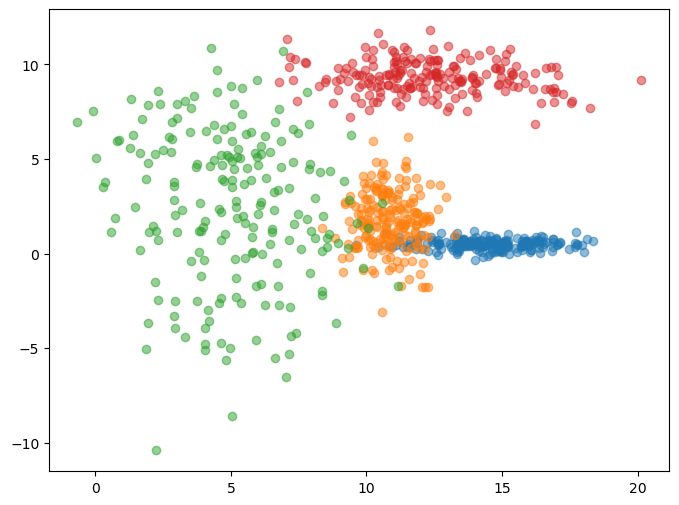

In [3]:
fig = plt.figure(figsize = (8,6), facecolor='white')
z = np.arange(0,15,0.1)
N = 200
for n in range(4):
    mean = np.random.random(2)*15
    std = np.random.random(2)*5
    distx = np.random.normal(mean[0], std[0], N)
    disty = np.random.normal(mean[1], std[1], N)
    plt.scatter(distx,disty, alpha=0.5)
plt.show()

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

FileNotFoundError: No such file or directory: 'two_categories_scatter_plot.png'

FileNotFoundError: No such file or directory: 'two_categories_scatter_plot.png'

<IPython.core.display.Image object>

In [7]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2024-12-07 15:05:24--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/cu0wjpyhyoy57w9yupavt/residuals_261.npy?rlkey=9rx6zjagfspm9mfc1jc3zejbt [following]
--2024-12-07 15:05:24--  https://www.dropbox.com/scl/fi/cu0wjpyhyoy57w9yupavt/residuals_261.npy?rlkey=9rx6zjagfspm9mfc1jc3zejbt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd467c3f08bfc70014c84327de6.dl.dropboxusercontent.com/cd/0/inline/Cfzfev18o-UFNSd7wv-37ckhzGeO0EhkoNSzjFcVKYQ7NQUrKFaUPwuHrrhI93zg06IWyToTAkRhB9SfKLHUE3NocGw4P34YWdZhoj5YXgWshmv1GBqSCLAP3UY_BF9x3QE/file# [following]
--2024-12-07 15:05:24--  https://ucd467c3f08bfc70014c84327de6.dl.dropboxusercontent.com/cd/0/inline/Cfzfev18o-UFNSd7wv-37ckhzGeO0Ehko

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18.]
[-0.42500000000001137, -1.949999999999818, nan, nan, nan, nan, nan, -0.04285714285731501, 0.04285714285697395, 0.1071428571428612, -0.022142857142711136, -0.11000000000001364, 0.05999999999997385, 0.1899999999999693, 0.10642857142849493, -0.04285714285708764, -0.1071428571428612, -0.08285714285722179, -0.1599999999999966]


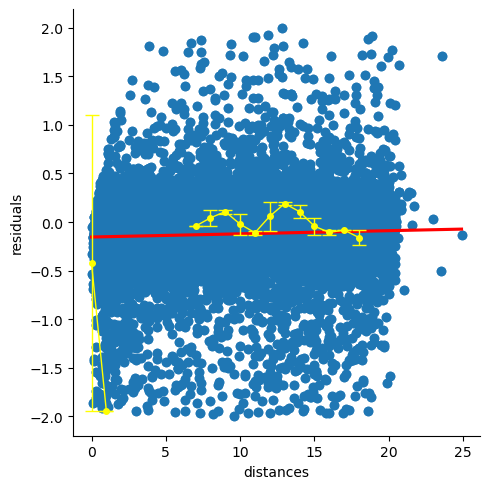

In [145]:
from scipy.stats import linregress

data = np.load("./residuals_261.npy.1",allow_pickle=True).item()
df = pd.DataFrame(data)
df = df[abs(df["residuals"])<2]
slope, intercept, r_value, p_value, std_err = linregress(df["distances"], df["residuals"])
sns.lmplot(x='distances', y='residuals', data=df, ci=None, line_kws={'color': 'red'})
df.dropna(how='any')
n_bins = 20
x = np.arange(0,20,1/n_bins*20)
y = [np.mean(df.loc[x[i]:x[i+1],"residuals"]) for i in range(len(x)-1)]
erry = [np.std(df.loc[x[i]:x[i+1],"residuals"]) for i in range(len(x)-1)]
plt.scatter(df["distances"],df["residuals"])
x = x[:-1]
print(x)
print(y)
plt.errorbar(x,y, yerr = erry, color = "yellow", marker = "o", linewidth = 1, markersize = 4, capsize = 5)
plt.show()